In [2]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
import pandas as pd
pd.set_option('display.max_columns', None )
import numpy as np

from sklearn.dummy import DummyClassifier
from sklearn.metrics import fbeta_score, precision_score, recall_score

from datetime import datetime

In [4]:
df_train = pd.read_hdf("../input/train_churn_pred.h5")
df_test = pd.read_hdf("../input/test_churn_pred.h5")
df_train.shape, df_test.shape

((34999, 171), (35000, 170))

In [5]:
df_train.sample(5)

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
29175,29175,0.0,0.0,0.0,30,31,31,502.481995,157.550995,0.000000,763.789978,154.190002,0.000000,101.839996,45.84375,0.000000,0.00,1.300000,1.750000,0.000000,3.580000,0.000000,15.690000,2.88,0.000000,10.760000,14.880000,0.000000,0.00,0.0,0.0,0.00,0.0,0.00,26.459999,17.760000,0.000,748.090027,148.740005,0.00,85.930000,29.790001,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,834.030029,178.539993,0.000000,0.0,0.13,0.0,5.15,0.0,0.00,0.0,0.0,0.0,865.640015,196.440002,0.000000,6.86,1.36,0.000000,28.559999,17.260000,0.000000,0.20,0.0,0.00,35.630001,18.629999,0.000000,0.00,0.73,0.00,16.540001,6.53,0.00,0.0,0.0,0.0,0.0,0.0,0.0,16.540001,7.26,0.00,52.180000,25.889999,0.000000,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.0,0.00,11,8,3,506,160,0,110,110,0,6/28/2014,7/25/2014,8/29/2014,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.0,0.000000,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,564,0.0,0.000000,0.000000,1
4176,4176,0.0,0.0,0.0,30,31,31,678.340027,0.000000,584.952026,115.110001,NaN,54.730000,1710.560059,NaN,958.880005,0.00,NaN,0.000000,0.000000,NaN,0.000000,60.689999,NaN,27.139999,448.679993,NaN,51.630001,0.00,NaN,0.0,3.26,NaN,5.08,509.380005,NaN,78.750,54.410000,NaN,27.58,1258.030029,NaN,890.590027,0.0,NaN,0.18,0.0,NaN,0.0,1312.439941,NaN,918.359985,0.0,NaN,0.0,9.93,NaN,17.33,0.0,NaN,0.0,1831.760010,0.000000,1014.479980,12.23,NaN,11.590000,77.660004,NaN,36.660000,0.68,NaN,0.41,90.

In [6]:
df_test.sample(5)

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
64829,64829,0.0,0.0,0.0,30,31,31,77.110001,136.373001,217.863007,2.610000,13.94,13.49,7.910000,58.750000,96.430000,0.0,0.0,0.0,0.0,0.0,0.0,2.610000,13.94,13.49,7.910000,35.790001,75.139999,0.00,0.000000,0.00,0.0,20.84,2.26,10.530000,49.740002,88.6250,0.00,0.0,0.0,0.000000,2.11,9.94,0.00,0.0,0.00,0.0,0.0,0.0,0.000000,2.11,9.94,0.0,0.0,0.11,0.81,27.790001,20.33,2.53,0.0,0.0,13.880000,79.660004,119.040001,1.640000,6.310000,8.110000,38.840000,95.089996,95.160004,1.800000,1.040039,1.38,42.290001,102.459999,104.660004,0.00,0.00,0.0,3.00,0.80,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0,3.00,0.800000,0.000000,45.380001,103.260002,105.660004,0.08,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.99,6,11,17,76,156,249,20,25,20,6/23/2014,7/30/2014,8/30/2014,14,20,17,6/23/2014,7/22/2014,8/30/2014,4.0,3.0,5.0,14.0,25.0,17.0,4.0,3.0,5.0,0.0,0.0,0.0,56.0,56.0,79.0,176.419998,36.110001,34.360001,0.000000,0.010002,0.000000,0.000000,0.06,0.0,4.66,6.81,2.58,0.0,0.0,0.0,0,0,0,4,3,5,0,0,0,0,0,0,1.0,1.0,1.0,439,0.000000,0.000000,0.000000
51113,51113,0.0,0.0,0.0,30,31,31,146.934998,3.560000,-3.428000,32.830002,0.00,2.03,120.989998,2.179688,17.530001,0.0,0.0,0.0,0.0,0.0,0.0,32.830002,0.00,2.03,120.430000,2.180000,15.790000,0.00,0.000000,1.73,0.0,0.00,0.00,153.259995,2.180000,19.5625,0.00,0.0,0.0,0.250000,0.00,0.00,0.31,0.0,0.00,0.0,0.0,0.0,0.560000,0.00,0.00,0.0,0.0,0.00,0.00,0.000000,0.20,0.00,0.0,0.0,153.830002,2.180000,19.760000,0.950000,0.000000,10.110000,76.739998,1.080000,6.950000,0.000000,

In [9]:
df_train.info(verbose=True, memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34999 entries, 3 to 69998
Data columns (total 171 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   id                        int64  
 1   loc_og_t2o_mou            float16
 2   std_og_t2o_mou            float16
 3   loc_ic_t2o_mou            float16
 4   last_date_of_month_6      int8   
 5   last_date_of_month_7      int8   
 6   last_date_of_month_8      int8   
 7   arpu_6                    float32
 8   arpu_7                    float32
 9   arpu_8                    float32
 10  onnet_mou_6               float32
 11  onnet_mou_7               float32
 12  onnet_mou_8               float32
 13  offnet_mou_6              float32
 14  offnet_mou_7              float16
 15  offnet_mou_8              float32
 16  roam_ic_mou_6             float32
 17  roam_ic_mou_7             float32
 18  roam_ic_mou_8             float32
 19  roam_og_mou_6             float32
 20  roam_og_mou_7             f

In [7]:
df_train.select_dtypes('object')

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
3,6/20/2014,7/16/2014,8/26/2014,NaN,NaN,NaN
6,6/22/2014,7/31/2014,8/26/2014,NaN,NaN,NaN
8,6/14/2014,7/30/2014,8/30/2014,NaN,7/24/2014,8/25/2014
10,6/30/2014,7/22/2014,8/26/2014,NaN,NaN,NaN
11,6/25/2014,7/17/2014,8/19/2014,6/12/2014,7/10/2014,8/8/2014
...,...,...,...,...,...,...
69987,6/26/2014,7/28/2014,8/28/2014,NaN,NaN,NaN
69993,6/30/2014,7/17/2014,8/28/2014,NaN,NaN,NaN
69994,6/29/2014,7/31/2014,8/31/2014,NaN,NaN,8/9/2014
69997,6/27/2014,7/25/2014,8/30/2014,NaN,NaN,NaN


In [8]:
feats_object = df_train.select_dtypes('object').columns.to_list()
feats_object

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [9]:
train = df_train.copy()
test = df_test.copy()

In [10]:
for feat in feats_object:
    train[feat] = pd.to_datetime(train[feat], format="%m/%d/%Y")
    test[feat] = pd.to_datetime(test[feat], format="%m/%d/%Y")

In [11]:
train['date_of_last_rech_data_7'].isna().sum()

25973

In [12]:
train.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
3,3,0.0,0.0,0.0,30,31,31,94.620003,138.817993,129.229004,57.540001,93.080002,79.730003,48.029999,110.00000,90.959999,0.0,0.0,0.0,0.0,0.0,0.00,8.540000,2.360000,39.029999,26.709999,71.779999,77.129997,0.00,0.26,2.94,0.00,0.00,0.00,35.259998,74.410004,119.125000,48.990002,90.709999,40.689999,21.309999,37.930000,10.880000,0.000000,0.000000,0.000000,0.0,0.0,0.0,70.309998,128.639999,51.580002,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,105.580002,203.059998,170.690002,6.210000,3.330000,15.780000,7.240000,18.010000,41.990002,0.000000,0.000000,0.000000,13.460000,21.340000,57.779999,1.11,23.530001,1.48,0.000000,2.560000,13.030000,0.00,0.000000,0.00,0.0,0.0,0.0,1.110000,26.090000,14.510000,14.960000,76.580002,72.290001,0.0,0.0,0.0,0.00,29.129999,0.00,0.38,0.0,0.0,3,2,5,120,120,310,120,120,130,2014-06-20,2014-07-16,2014-08-26,120,0,130,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,0.00000,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,389,0.0,0.0,0.0,0
6,6,0.0,0.0,0.0,30,31,31,139.126007,183.020996,225.307999,57.959999,45.860001,62.860001,170.830002,213.25000,167.690002,0.0,0.0,0.0,0.0,0.0,0.00,57.959999,45.860001,62.860001,124.480003,116.790001,146.059998,7.28,2.85,3.38,0.00,0.00,0.00,189.729996,165.509995,212.250000,0.000000,0.000000,0.000000,0.000000,0.000000,1.350000,39.060001,93.589996,16.059999,0.0,0.0,0.0,39.060001,93.589996,17.410000,0.00,0.0,0.28,0.00,

In [13]:
train[feats_object].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
3,2014-06-20,2014-07-16,2014-08-26,NaT,NaT,NaT
6,2014-06-22,2014-07-31,2014-08-26,NaT,NaT,NaT
8,2014-06-14,2014-07-30,2014-08-30,NaT,2014-07-24,2014-08-25
10,2014-06-30,2014-07-22,2014-08-26,NaT,NaT,NaT
11,2014-06-25,2014-07-17,2014-08-19,2014-06-12,2014-07-10,2014-08-08


In [14]:
train[feats_object].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34999 entries, 3 to 69998
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date_of_last_rech_6       34449 non-null  datetime64[ns]
 1   date_of_last_rech_7       34363 non-null  datetime64[ns]
 2   date_of_last_rech_8       33788 non-null  datetime64[ns]
 3   date_of_last_rech_data_6  8767 non-null   datetime64[ns]
 4   date_of_last_rech_data_7  9026 non-null   datetime64[ns]
 5   date_of_last_rech_data_8  9274 non-null   datetime64[ns]
dtypes: datetime64[ns](6)
memory usage: 1.9 MB


In [15]:
train['date_of_last_rech_6'].value_counts()

2014-06-30    5865
2014-06-29    4429
2014-06-27    4009
2014-06-28    3403
2014-06-26    1977
2014-06-25    1726
2014-06-24    1477
2014-06-17    1395
2014-06-14    1355
2014-06-21    1327
2014-06-23    1052
2014-06-18     933
2014-06-12     869
2014-06-22     820
2014-06-13     731
2014-06-19     683
2014-06-20     625
2014-06-16     390
2014-06-15     292
2014-06-11     205
2014-06-08     168
2014-06-05     116
2014-06-07     106
2014-06-10      95
2014-06-03      92
2014-06-01      82
2014-06-06      66
2014-06-09      66
2014-06-04      54
2014-06-02      41
Name: date_of_last_rech_6, dtype: int64

In [16]:
train['date_of_last_rech_7'].value_counts()

2014-07-31    6097
2014-07-30    4826
2014-07-25    3262
2014-07-29    3107
2014-07-28    2721
2014-07-27    2084
2014-07-26    1917
2014-07-24    1363
2014-07-19    1078
2014-07-22    1070
2014-07-20    1026
2014-07-17     977
2014-07-23     813
2014-07-16     808
2014-07-21     593
2014-07-15     541
2014-07-18     408
2014-07-09     285
2014-07-10     279
2014-07-12     246
2014-07-14     164
2014-07-11     121
2014-07-13     117
2014-07-06     103
2014-07-08      76
2014-07-04      72
2014-07-05      55
2014-07-03      54
2014-07-07      49
2014-07-02      26
2014-07-01      25
Name: date_of_last_rech_7, dtype: int64

In [17]:
train['date_of_last_rech_8'].value_counts()

2014-08-31    5198
2014-08-30    3999
2014-08-29    3525
2014-08-28    3413
2014-08-26    3308
2014-08-25    2764
2014-08-24    2673
2014-08-27    1974
2014-08-22     701
2014-08-20     651
2014-08-23     623
2014-08-19     566
2014-08-21     487
2014-08-18     401
2014-08-09     358
2014-08-05     327
2014-08-14     307
2014-08-15     303
2014-08-13     268
2014-08-16     258
2014-08-08     248
2014-08-17     246
2014-08-12     242
2014-08-06     216
2014-08-11     201
2014-08-07     148
2014-08-10     117
2014-08-01      90
2014-08-02      71
2014-08-04      59
2014-08-03      46
Name: date_of_last_rech_8, dtype: int64

In [18]:
train['date_of_last_rech_6_year'] = train['date_of_last_rech_6'].apply(lambda x: x.year)
train['date_of_last_rech_7_year'] = train['date_of_last_rech_7'].apply(lambda x: x.year)
train['date_of_last_rech_8_year'] = train['date_of_last_rech_8'].apply(lambda x: x.year)

train['date_of_last_rech_6_month'] = train['date_of_last_rech_6'].apply(lambda x: x.month)
train['date_of_last_rech_7_month'] = train['date_of_last_rech_7'].apply(lambda x: x.month)
train['date_of_last_rech_8_month'] = train['date_of_last_rech_8'].apply(lambda x: x.month)

train['date_of_last_rech_6_day'] = train['date_of_last_rech_6'].apply(lambda x: x.day)
train['date_of_last_rech_7_day'] = train['date_of_last_rech_7'].apply(lambda x: x.day)
train['date_of_last_rech_8_day'] = train['date_of_last_rech_8'].apply(lambda x: x.day)


In [19]:
test['date_of_last_rech_6_year'] = test['date_of_last_rech_6'].apply(lambda x: x.year)
test['date_of_last_rech_7_year'] = test['date_of_last_rech_7'].apply(lambda x: x.year)
test['date_of_last_rech_8_year'] = test['date_of_last_rech_8'].apply(lambda x: x.year)

test['date_of_last_rech_6_month'] = test['date_of_last_rech_6'].apply(lambda x: x.month)
test['date_of_last_rech_7_month'] = test['date_of_last_rech_7'].apply(lambda x: x.month)
test['date_of_last_rech_8_month'] = test['date_of_last_rech_8'].apply(lambda x: x.month)

test['date_of_last_rech_6_day'] = test['date_of_last_rech_6'].apply(lambda x: x.day)
test['date_of_last_rech_7_day'] = test['date_of_last_rech_7'].apply(lambda x: x.day)
test['date_of_last_rech_8_day'] = test['date_of_last_rech_8'].apply(lambda x: x.day)

In [20]:
train.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,date_of_last_rech_6_year,date_of_last_rech_7_year,date_of_last_rech_8_year,date_of_last_rech_6_month,date_of_last_rech_7_month,date_of_last_rech_8_month,date_of_last_rech_6_day,date_of_last_rech_7_day,date_of_last_rech_8_day
3,3,0.0,0.0,0.0,30,31,31,94.620003,138.817993,129.229004,57.540001,93.080002,79.730003,48.029999,110.00000,90.959999,0.0,0.0,0.0,0.0,0.0,0.00,8.540000,2.360000,39.029999,26.709999,71.779999,77.129997,0.00,0.26,2.94,0.00,0.00,0.00,35.259998,74.410004,119.125000,48.990002,90.709999,40.689999,21.309999,37.930000,10.880000,0.000000,0.000000,0.000000,0.0,0.0,0.0,70.309998,128.639999,51.580002,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,105.580002,203.059998,170.690002,6.210000,3.330000,15.780000,7.240000,18.010000,41.990002,0.000000,0.000000,0.000000,13.460000,21.340000,57.779999,1.11,23.530001,1.48,0.000000,2.560000,13.030000,0.00,0.000000,0.00,0.0,0.0,0.0,1.110000,26.090000,14.510000,14.960000,76.580002,72.290001,0.0,0.0,0.0,0.00,29.129999,0.00,0.38,0.0,0.0,3,2,5,120,120,310,120,120,130,2014-06-20,2014-07-16,2014-08-26,120,0,130,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.000000,0.000000,0.00000,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,389,0.0,0.0,0.0,0,2014.0,2014.0,2014.0,6.0,7.0,8.0,20.0,16.0,26.0
6,6,0.0,0.0,0.0,30,31,31,139.126007,183.020996,225.307999,57.959999,45.860001,62.860001,170.830002,213.25000,167.690002,0.0,0.0,0.0,0.0,0.0,0.0

In [21]:
test.head()

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,date_of_last_rech_6_year,date_of_last_rech_7_year,date_of_last_rech_8_year,date_of_last_rech_6_month,date_of_last_rech_7_month,date_of_last_rech_8_month,date_of_last_rech_6_day,date_of_last_rech_7_day,date_of_last_rech_8_day
0,0,0.0,0.0,0.0,30,31,31,11.200000,672.995972,578.088013,0.000000,17.280001,26.959999,11.430000,258.000000,332.410004,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,2.590000,10.390000,11.430000,248.210007,274.459991,0.00,0.43,0.0,0.00,9.11,0.58,11.430000,251.240005,284.750,0.00,14.68,16.559999,0.000000,0.23,57.360001,0.0,0.0,0.00,0.0,0.0,0.0,0.000000,14.91,73.93,0.0,0.0,0.0,0.000000,10.190000,3.330000,0.00,0.0,0.0,11.430000,276.359985,362.130005,0.000000,0.000000,0.000000,1.430000,184.509995,164.179993,0.00,0.000000,0.00,1.430000,184.509995,164.179993,0.0,10.88,29.540001,0.000000,1.140000,0.000000,0.0,0.00,0.00,0.0,0.0,0.0,0.000000,12.030000,29.540001,1.430000,196.539993,193.940002,0.0,0.0,0.21,0.0,0.0,0.0,0.00,0.0,0.0,1,10,12,0,361,724,0,110,154,2014-06-12,2014-07-25,2014-08-28,0,30,130,NaT,2014-07-22,2014-08-01,NaN,4.0,1.0,NaN,252.0,154.0,NaN,3.0,1.0,NaN,1.0,0.0,NaN,348.0,154.0,0.00,22.920000,48.07,0.0,1211.0,751.289978,NaN,14.59,0.000000,NaN,0.000000,0.000000,NaN,0.0,0.0,0,0,1,0,3,0,0,1,0,0,0,0,NaN,1.0,1.0,302,383.170013,1007.099976,0.0,2014.0,2014.0,2014.0,6.0,7.0,8.0,12.0,25.0,28.0
1,1,0.0,0.0,0.0,30,31,31,165.908997,251.362000,254.197998,70.959999,40.459999,41.040001,135.309998,128.125000,66.239998,0.0,41.060001,0.0,0.0,29.05999

In [22]:
!pwd

/home/jovyan/master_class/customer_churn_prediction/notebooks


In [25]:
# train.to_csv('train_churn.csv')
test.to_csv('test_churn.csv')

In [24]:
train.to_hdf('train.h5', key='train', mode='w')
test.to_hdf('test.h5', key='test', mode='w') 

In [76]:
df_tr = pd.read_hdf("train.h5")
df_ts = pd.read_hdf("test.h5")
df_tr.shape, df_ts.shape

((34999, 180), (35000, 179))

In [77]:
df_tr

,id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,date_of_last_rech_6_year,date_of_last_rech_7_year,date_of_last_rech_8_year,date_of_last_rech_6_month,date_of_last_rech_7_month,date_of_last_rech_8_month,date_of_last_rech_6_day,date_of_last_rech_7_day,date_of_last_rech_8_day
3,3,0.0,0.0,0.0,30,31,31,94.620003,138.817993,129.229004,57.540001,93.080002,79.730003,48.029999,110.000000,90.959999,0.00,0.000000,0.00,0.000000,0.00,0.00,8.540000,2.360000,39.029999,26.709999,71.779999,77.129997,0.00,0.26,2.94,0.00,0.00,0.00,35.259998,74.410004,119.125000,48.990002,90.709999,40.689999,21.309999,37.930000,10.880000,0.000000,0.000000,0.000000,0.0,0.0,0.0,70.309998,128.639999,51.580002,0.00,0.0,0.00,0.000000,0.000000,0.00,0.00,0.0,0.0,105.580002,203.059998,170.690002,6.210000,3.330000,15.780000,7.240000,18.010000,41.990002,0.000000,0.000000,0.000000,13.460000,21.340000,57.779999,1.110000,23.530001,1.48,0.000000,2.560000,13.030000,0.00,0.000000,0.00,0.0,0.0,0.0,1.110000,26.090000,14.510000,14.960000,76.580002,72.290001,0.00,0.00,0.0,0.000000,29.129999,0.00,0.38,0.0,0.0,3,2,5,120,120,310,120,120,130,2014-06-20,2014-07-16,2014-08-26,120,0,130,NaT,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.000000,0.000000,0.000000,0.0,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,389,0.0,0.00,0.0,0,2014.0,2014.0,2014.0,6.0,7.0,8.0,20.0,16.0,26.0
6,6,0.0,0.0,0.0,30,31,31,139.126007,183.020996,225.307999,57.959999,45.860001,62.860001,170.830002,213.25000

In [82]:
df_tr['date_of_last_rech_8_year'].fillna(2014)

3        2014.0
6        2014.0
8        2014.0
10       2014.0
11       2014.0
          ...  
69987    2014.0
69993    2014.0
69994    2014.0
69997    2014.0
69998    2014.0
Name: date_of_last_rech_8_year, Length: 34999, dtype: float64

<AxesSubplot:>

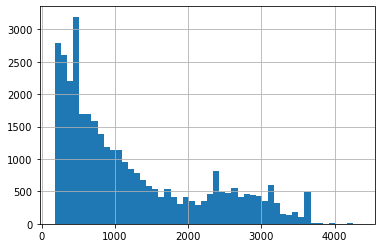

In [31]:
train['aon'].hist(bins=50)

<AxesSubplot:>

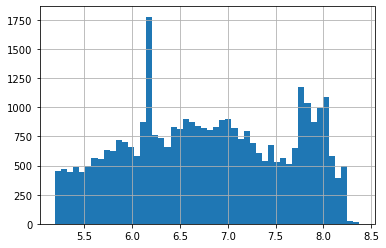

In [32]:
np.log(train['aon']).hist(bins=50)

<AxesSubplot:>

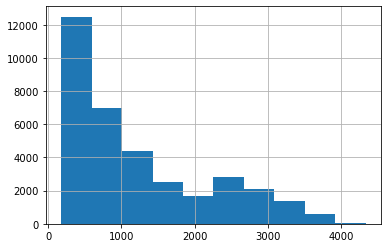

In [36]:
np.exp(np.log(train['aon'])).hist()

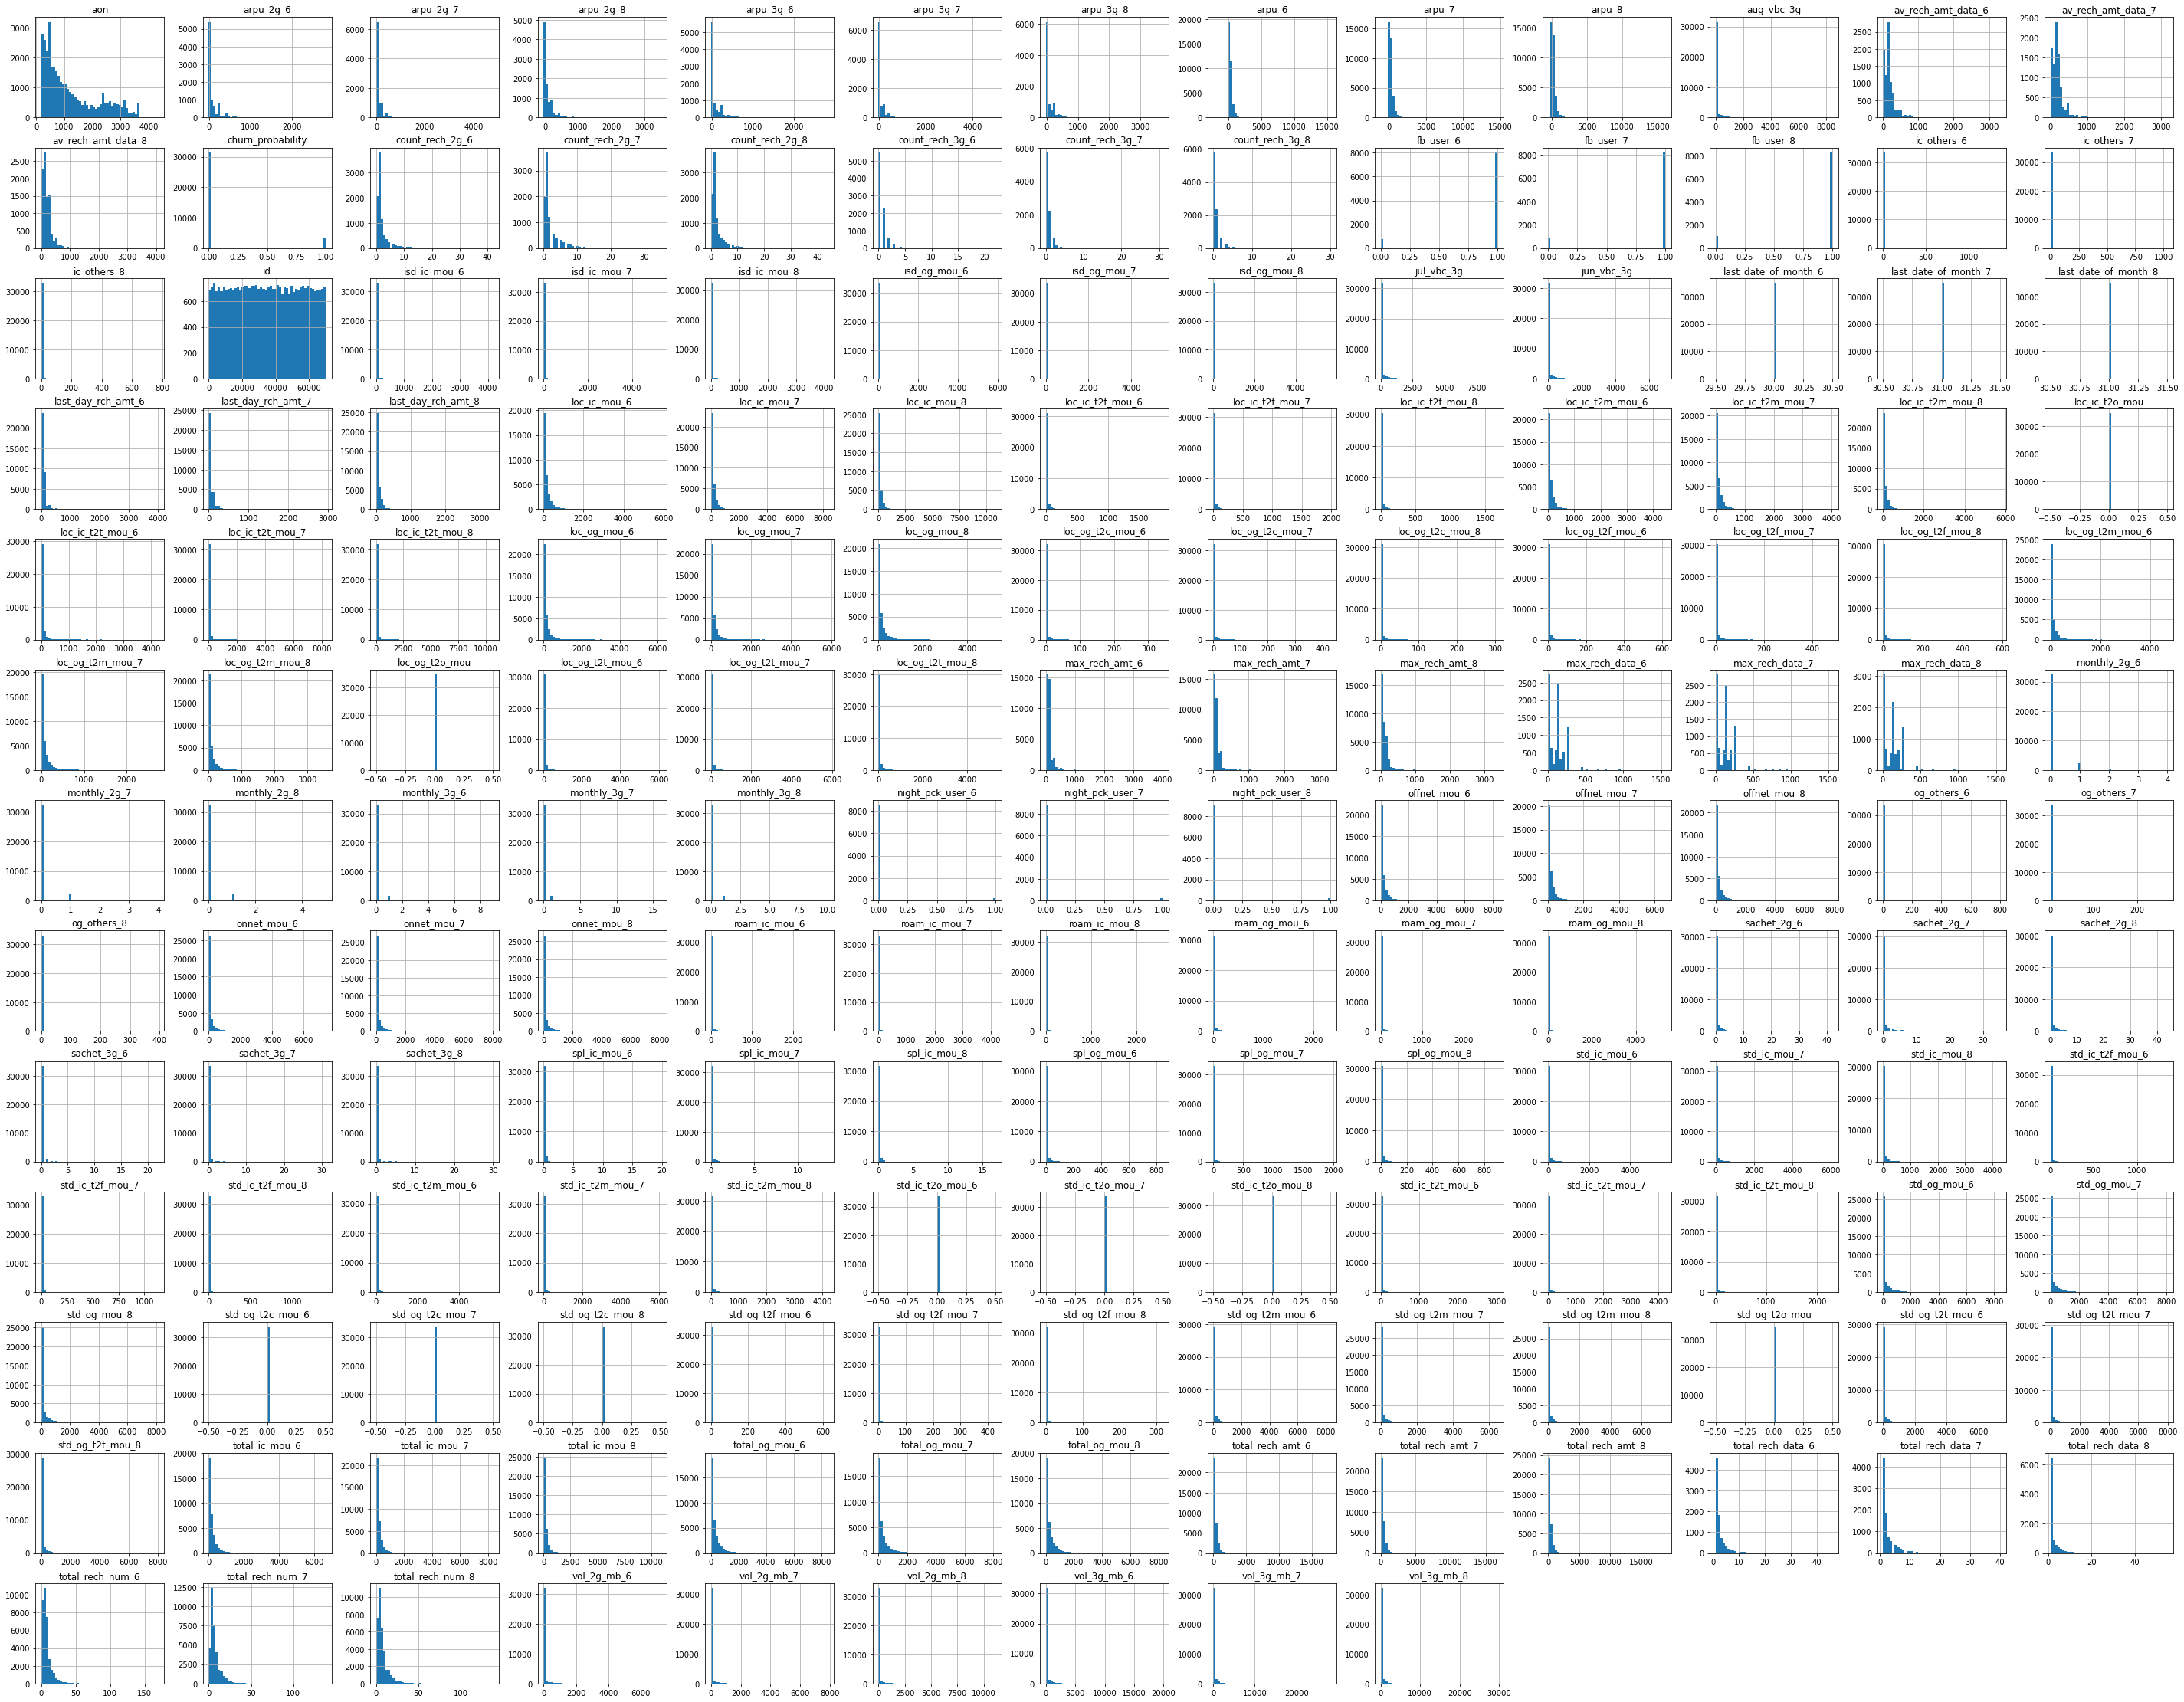

In [13]:
df_train.hist(figsize=(50,40), bins=50);

In [37]:
feats = ["aon"]

X_train = df_train[feats].values
y_train = df_train["churn_probability"].values

X_test  = df_test[feats].values 

In [38]:
model = DummyClassifier(strategy="stratified")
model.fit(X_train, y_train)

DummyClassifier(strategy='stratified')

In [39]:
y_pred = model.predict(X_test)
df_test["churn_probability"] = y_pred

df_test["churn_probability"].value_counts()

0    31379
1     3621
Name: churn_probability, dtype: int64

In [40]:
df_test["churn_probability"]

0        0
1        0
2        0
4        0
5        0
        ..
69990    0
69991    0
69992    0
69995    0
69996    0
Name: churn_probability, Length: 35000, dtype: int8